## Datos del Grupo

Nombre y Apellido | LU
------------------|---


---




#Conjunto de Datos Inicial (Datasets) 

*   DFTotal.csv (1.2 MB): Datos de clientes con servicio de IPTV durante 2021 por meses. 

## Herramientas utilizadas





A continuación se detallan las herramientas utilizadas para el desarrollo del examen.

*   Google Colab
*   Anaconda Navigator
*   MySQL Workbench
*   Tableau Desktop
*   MS SQL Server Management Studio


# Carga de datos



In [50]:
#Montamos el Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [51]:
#Importamos las librerias que vamos a utilizar 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
import folium

pd.set_option('display.max_columns', None)

* Cargamos los archivos CSV en sus respectivos dataframes: 

In [52]:
# Guardamos las rutas en variables
foto_mes_path = "/content/drive/MyDrive/CursoCienciaDatos/B4 Examen/DFTotal.csv"

# Cargamos los datos
foto_mes = pd.read_csv(foto_mes_path, dtype={'foto_mes': 'str','DISCRIMINATOR': 'str'})

In [53]:
foto_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19034 entries, 0 to 19033
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   foto_mes                19034 non-null  object 
 1   NumeroCliente           19034 non-null  int64  
 2   ServicioIPTV            19034 non-null  int64  
 3   PersonaFisica           19034 non-null  int64  
 4   CuentaRefinanciada      19034 non-null  int64  
 5   ServicioHabilitado      19034 non-null  int64  
 6   Saldo                   19034 non-null  float64
 7   DebitoAutomatico        19034 non-null  int64  
 8   CantidadReclamos        19034 non-null  int64  
 9   MesesServicio           19034 non-null  float64
 10  MesesCliente            19034 non-null  float64
 11  PaqueteHBO              19034 non-null  int64  
 12  PaqueteHD               19034 non-null  int64  
 13  PaqueteAdultos          19034 non-null  int64  
 14  PaqueteFutbol           19034 non-null

* Verificamos los datos del archivo cargado

In [54]:
foto_mes.head()

,foto_mes,NumeroCliente,ServicioIPTV,PersonaFisica,CuentaRefinanciada,ServicioHabilitado,Saldo,DebitoAutomatico,CantidadReclamos,MesesServicio,MesesCliente,PaqueteHBO,PaqueteHD,PaqueteAdultos,PaqueteFutbol,TieneBonificacion,CantOtrosServMismoLote,CantOtrosServOtroLote,target_bin
0,202105,50016,537453,1,0,1,0.00,0,1,49.57,441.37,0,0,0,0,1,3,5,0
1,202105,50016,672504,1,0,1,0.00,0,0,22.52,441.37,0,1,0,0,0,4,4,0
2,202105,50024,433890,1,0,1,0.17,1,0,73.25,405.40,0,1,0,0,0,2,4,0
3,202105,50125,455362,1,0,1,0.00,1,0,68.06,429.61,0,1,0,0,0,1,0,0
4,202105,50157,505289,1,0,1,0.00,0,0,53.77,428.46,0,0,0,0,0,3,0,0


# Limpieza y Transformación de datos



In [55]:
#Verificacion y tratamiento de nulos
foto_mes.isnull().sum()

foto_mes                  0
NumeroCliente             0
ServicioIPTV              0
PersonaFisica             0
CuentaRefinanciada        0
ServicioHabilitado        0
Saldo                     0
DebitoAutomatico          0
CantidadReclamos          0
MesesServicio             0
MesesCliente              0
PaqueteHBO                0
PaqueteHD                 0
PaqueteAdultos            0
PaqueteFutbol             0
TieneBonificacion         0
CantOtrosServMismoLote    0
CantOtrosServOtroLote     0
target_bin                0
dtype: int64

No contiene valores NaN ya que el archivo habia sido pre-procesado y limpiado en el notebook anterior.

In [56]:
foto_mes['foto_mes_date'] = foto_mes['foto_mes'].astype(str).str[:4] + "-" + foto_mes['foto_mes'].astype(str).str[5:7] + "-01"

foto_mes["foto_mes_date"] = pd.to_datetime(foto_mes['foto_mes_date'])
foto_mes['Año'] = foto_mes['foto_mes_date'].dt.year
foto_mes['Mes'] = foto_mes['foto_mes_date'].dt.month

foto_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19034 entries, 0 to 19033
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   foto_mes                19034 non-null  object        
 1   NumeroCliente           19034 non-null  int64         
 2   ServicioIPTV            19034 non-null  int64         
 3   PersonaFisica           19034 non-null  int64         
 4   CuentaRefinanciada      19034 non-null  int64         
 5   ServicioHabilitado      19034 non-null  int64         
 6   Saldo                   19034 non-null  float64       
 7   DebitoAutomatico        19034 non-null  int64         
 8   CantidadReclamos        19034 non-null  int64         
 9   MesesServicio           19034 non-null  float64       
 10  MesesCliente            19034 non-null  float64       
 11  PaqueteHBO              19034 non-null  int64         
 12  PaqueteHD               19034 non-null  int64 

Preparamos una columna con formato datetime para luego graficar series de tiempo. 

In [57]:
mask = (foto_mes['target_bin'] == 1) 
foto_mes_bajas = foto_mes.loc[mask].copy()

In [58]:
#foto_mes_bajas.head()
foto_mes_bajas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 254 to 18724
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   foto_mes                552 non-null    object        
 1   NumeroCliente           552 non-null    int64         
 2   ServicioIPTV            552 non-null    int64         
 3   PersonaFisica           552 non-null    int64         
 4   CuentaRefinanciada      552 non-null    int64         
 5   ServicioHabilitado      552 non-null    int64         
 6   Saldo                   552 non-null    float64       
 7   DebitoAutomatico        552 non-null    int64         
 8   CantidadReclamos        552 non-null    int64         
 9   MesesServicio           552 non-null    float64       
 10  MesesCliente            552 non-null    float64       
 11  PaqueteHBO              552 non-null    int64         
 12  PaqueteHD               552 non-null    int64 

In [59]:
mask = (foto_mes['target_bin'] == 0) 
foto_mes_activos = foto_mes.loc[mask].copy()

In [60]:
#foto_mes_activos.head()
foto_mes_activos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18482 entries, 0 to 19033
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   foto_mes                18482 non-null  object        
 1   NumeroCliente           18482 non-null  int64         
 2   ServicioIPTV            18482 non-null  int64         
 3   PersonaFisica           18482 non-null  int64         
 4   CuentaRefinanciada      18482 non-null  int64         
 5   ServicioHabilitado      18482 non-null  int64         
 6   Saldo                   18482 non-null  float64       
 7   DebitoAutomatico        18482 non-null  int64         
 8   CantidadReclamos        18482 non-null  int64         
 9   MesesServicio           18482 non-null  float64       
 10  MesesCliente            18482 non-null  float64       
 11  PaqueteHBO              18482 non-null  int64         
 12  PaqueteHD               18482 non-null  int64 

# Análisis 



## Analizamos cual podría ser la clave primaria

## Contamos el número de clientes y de servicios IPTV que tenemos

In [61]:
foto_mes_activos['ServicioIPTV'].count()

18482

In [62]:
foto_mes_bajas['ServicioIPTV'].count()

552

## Agrupamos por Numero Cliente, Servicio IPTV, y por Foto_Mes para ver si los mismos se repiten

In [ ]:
foto_mes.groupby(['NumeroCliente']).size()

NumeroCliente
50016     10
50024      5
50125      5
50157      5
50176      5
          ..
110587     5
110619     5
110715     5
110733     5
110826     5
Length: 3709, dtype: int64

In [ ]:
foto_mes.groupby(['ServicioIPTV']).size()

ServicioIPTV
334119    5
334123    5
334128    5
334131    5
334133    5
         ..
860292    3
863080    1
863083    1
865921    2
867085    2
Length: 3884, dtype: int64

NumeroCliente
50016     10
50024      5
50125      5
50157      5
50176      5
          ..
110587     5
110619     5
110715     5
110733     5
110826     5
Length: 3709, dtype: int64

Verificamos que sí se repiten, así que tomamos un número de cliente al azar para analizar. En este caso tomamos el número 50016.

In [ ]:
foto_mes[foto_mes['NumeroCliente']==50016]

,foto_mes,NumeroCliente,ServicioIPTV,PersonaFisica,CuentaRefinanciada,ServicioHabilitado,Saldo,DebitoAutomatico,CantidadReclamos,MesesServicio,MesesCliente,PaqueteHBO,PaqueteHD,PaqueteAdultos,PaqueteFutbol,TieneBonificacion,CantOtrosServMismoLote,CantOtrosServOtroLote,target_bin
0,202105,50016,537453,1,0,1,0.0,0,1,49.57,441.37,0,0,0,0,1,3,5,0
1,202105,50016,672504,1,0,1,0.0,0,0,22.52,441.37,0,1,0,0,0,4,4,0
3411,202106,50016,537453,1,0,1,0.0,0,1,50.55,442.36,0,0,0,0,1,3,5,0
3412,202106,50016,672504,1,0,1,0.0,0,0,23.50,442.36,0,1,0,0,0,4,4,0
7245,202107,50016,537453,1,0,1,0.0,0,2,51.57,443.38,0,0,0,0,1,3,5,0
7246,202107,50016,672504,1,0,1,0.0,0,0,24.52,443.38,0,1,0,0,0,4,4,0
10613,202108,50016,537453,1,0,1,0.0,0,2,52.59,444.40,0,0,0,0,1,3,5,0
10614,202108,50016,672504,1,0,1,0.0,0,0,25.54,444.40,0,1,0,0,0,4,4,0
14394,202109,50016,537453,1,0,1,0.0,0,2,53.57,445.38,0,0,0,0,1,3,5,0
14395,202109,50016,672504,1,0,1,0.0,0,0,26.53,445.38,0,1,0,0,0,4,4,0


Volvemos a contar pero ahora por Numero Cliente, Servicio IPTV y Foto Mes. Para verificar que no tengamos duplicados.

In [ ]:
foto_mes.groupby(['NumeroCliente', 'ServicioIPTV', 'foto_mes']).size()

NumeroCliente  ServicioIPTV  foto_mes
50016          537453        202105      1
                             202106      1
                             202107      1
                             202108      1
                             202109      1
                                        ..
110826         602634        202105      1
                             202106      1
                             202107      1
                             202108      1
                             202109      1
Length: 19034, dtype: int64

Ya no tenemos duplicados, y nos da un total de 19032 registros. 

Por lo tanto nuestra clave primaria es: Numero Cliente, Servicio IPTV y Foto Mes.

In [ ]:
# Ordenamos los dataframes por fecha, Numero de Cliente,  y ServicioIPTV
foto_mes = foto_mes.sort_values(['foto_mes_date', 'NumeroCliente', 'ServicioIPTV'], ascending=True)
foto_mes_activos = foto_mes_activos.sort_values(['foto_mes_date', 'NumeroCliente', 'ServicioIPTV'], ascending=True)
foto_mes_bajas = foto_mes_bajas.sort_values(['foto_mes_date', 'NumeroCliente', 'ServicioIPTV'], ascending=True)

In [ ]:
foto_mes.head()

,foto_mes,NumeroCliente,ServicioIPTV,PersonaFisica,CuentaRefinanciada,ServicioHabilitado,Saldo,DebitoAutomatico,CantidadReclamos,MesesServicio,MesesCliente,PaqueteHBO,PaqueteHD,PaqueteAdultos,PaqueteFutbol,TieneBonificacion,CantOtrosServMismoLote,CantOtrosServOtroLote,target_bin,foto_mes_date,Año,Mes
0,202105,50016,537453,1,0,1,0.00,0,1,49.57,441.37,0,0,0,0,1,3,5,0,2021-05-01,2021,5
1,202105,50016,672504,1,0,1,0.00,0,0,22.52,441.37,0,1,0,0,0,4,4,0,2021-05-01,2021,5
2,202105,50024,433890,1,0,1,0.17,1,0,73.25,405.40,0,1,0,0,0,2,4,0,2021-05-01,2021,5
3,202105,50125,455362,1,0,1,0.00,1,0,68.06,429.61,0,1,0,0,0,1,0,0,2021-05-01,2021,5
4,202105,50157,505289,1,0,1,0.00,0,0,53.77,428.46,0,0,0,0,0,3,0,0,2021-05-01,2021,5


# Visualizaciones

In [63]:
#Funcion para mostrar los valores de las columnas en gráficos
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

 Análisis Mensual

In [64]:
# Totales y bajas por mes 
totales_por_mes = pd.DataFrame({'Cantidades' : foto_mes.groupby('Mes').size()}).reset_index()
bajas_por_mes = pd.DataFrame({'Cantidades' : foto_mes_bajas.groupby('Mes').size()}).reset_index()

# % de Clientes IPTV que se dan de baja por mes
bajas_por_mes['Porcentaje'] = bajas_por_mes['Cantidades']*100/(totales_por_mes['Cantidades'])
print(totales_por_mes)
print(bajas_por_mes)

   Mes  Cantidades
0    5        3851
1    6        3834
2    7        3808
3    8        3781
4    9        3760
   Mes  Cantidades  Porcentaje
0    5         327    8.491301
1    6          31    0.808555
2    7         156    4.096639
3    8          18    0.476065
4    9          20    0.531915


[]

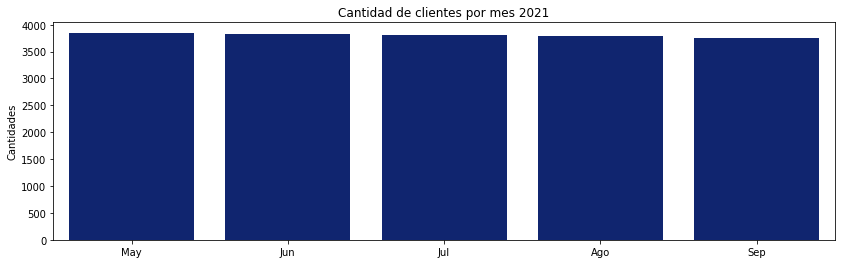

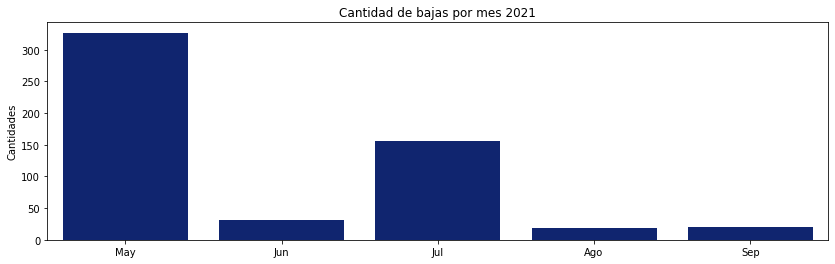

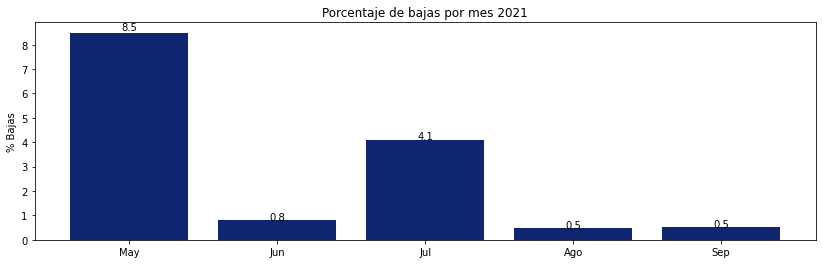

In [75]:
sns.set_color_codes("dark") 

fig, graf = plt.subplots(figsize = (14, 4))
#ax = plt.subplots(2,1,figsize=(20,10))
graf= sns.barplot(x=np.array(totales_por_mes['Mes']).astype(int),y="Cantidades", data=totales_por_mes, color="b" )
graf.set_title('Cantidad de clientes por mes 2021', size=12)
#graf.set_xticklabels(['Ene','Feb','Mar','Abr','May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
graf.set_xticklabels(['May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov'])

fig2, graf2 = plt.subplots(figsize = (14, 4))
graf2= sns.barplot(x=np.array(bajas_por_mes['Mes']).astype(int),y="Cantidades", data=bajas_por_mes, color="b" )
graf2.set_title('Cantidad de bajas por mes 2021', size=12)
#graf2.set_xticklabels(['Ene','Feb','Mar','Abr','May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
graf2.set_xticklabels(['May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov'])

fig3, graf3 = plt.subplots(figsize = (14, 4))
graf3 = sns.barplot(x=np.array(bajas_por_mes['Mes']).astype(int),y='Porcentaje', data=bajas_por_mes, color="b" )
graf3.set(ylabel="% Bajas")
graf3.set_title('Porcentaje de bajas por mes 2021', size=12)
#graf3.set_xticklabels(['Ene','Feb','Mar','Abr','May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
graf3.set_xticklabels(['May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov'])
show_values(graf3)

plt.plot()

In [93]:
foto_mes_bajas.head()

,foto_mes,NumeroCliente,ServicioIPTV,PersonaFisica,CuentaRefinanciada,ServicioHabilitado,Saldo,DebitoAutomatico,CantidadReclamos,MesesServicio,MesesCliente,PaqueteHBO,PaqueteHD,PaqueteAdultos,PaqueteFutbol,TieneBonificacion,CantOtrosServMismoLote,CantOtrosServOtroLote,target_bin,foto_mes_date,Año,Mes
254,202105,55545,554750,1,0,1,2772.33,1,0,45.19,402.05,0,0,0,0,0,2,0,1,2021-05-01,2021,5
496,202105,60165,377417,1,0,1,0.00,1,0,79.10,293.66,0,1,0,0,0,2,0,1,2021-05-01,2021,5
687,202105,63599,682617,1,0,1,4788.95,1,0,20.39,258.24,1,1,0,1,0,2,0,1,2021-05-01,2021,5
1067,202105,72173,379805,1,1,1,0.00,1,0,78.54,205.54,0,1,0,0,0,2,2,1,2021-05-01,2021,5
1246,202105,75923,558290,1,0,1,0.00,1,0,44.11,185.14,0,0,0,0,0,2,4,1,2021-05-01,2021,5


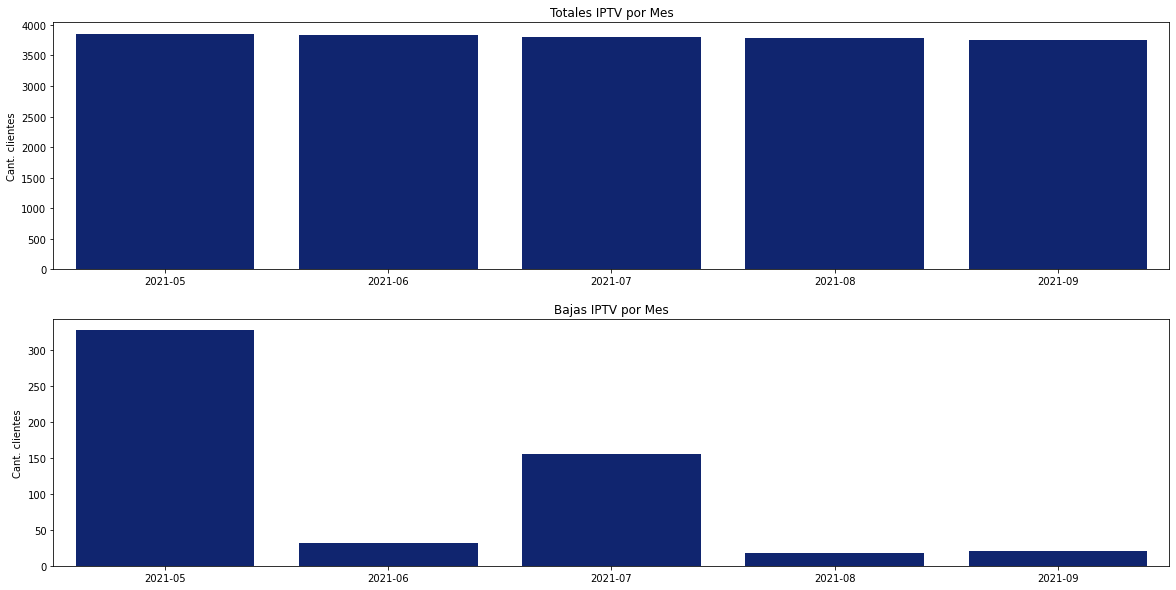

In [81]:
# Grafica utilizando la serie de tiempo en el campo Fecha, para graficar cantidades por Mes de Activos y Bajas
from matplotlib.colors import TwoSlopeNorm 

fig, ax = plt.subplots(2,1,figsize=(20,10))

#Grafica Mensual Totales
date = pd.DataFrame(foto_mes['foto_mes_date'].dt.to_period('m').value_counts())
date = date.sort_index()

vmin = date['foto_mes_date'].min()
vmax = date['foto_mes_date'].max()
vcenter = (vmax + vmin) / 2
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

colors = [plt.cm.Blues(8) for c in date['foto_mes_date']]

sns.barplot(x=date.index, y= date['foto_mes_date'], color="b", ax=ax[0]).set(title='Totales IPTV por Mes')
ax[0].set_xticklabels(date.index, rotation=0)
ax[0].set(ylabel='Cant. clientes')

#Grafica Mensual Bajas
date = pd.DataFrame(foto_mes_bajas['foto_mes_date'].dt.to_period('m').value_counts())
date = date.sort_index()

vmin = date['foto_mes_date'].min()
vmax = date['foto_mes_date'].max()
vcenter = (vmax + vmin) / 2
norm = TwoSlopeNorm (vmin=vmin, vcenter=vcenter, vmax=vmax)

colors = [plt.cm.Blues(norm(c)) for c in date['foto_mes_date']]

sns.barplot(x=date.index, y= date['foto_mes_date'], color="b", ax=ax[1]).set(title='Bajas IPTV por Mes')
ax[1].set_xticklabels(date.index, rotation=0)
ax[1].set(ylabel='Cant. clientes')

plt.show()

##Analizamos la cantidad de clientes por Tipo para determinar si hay alguno que presenta mayor proporcion de bajas respecto al resto.

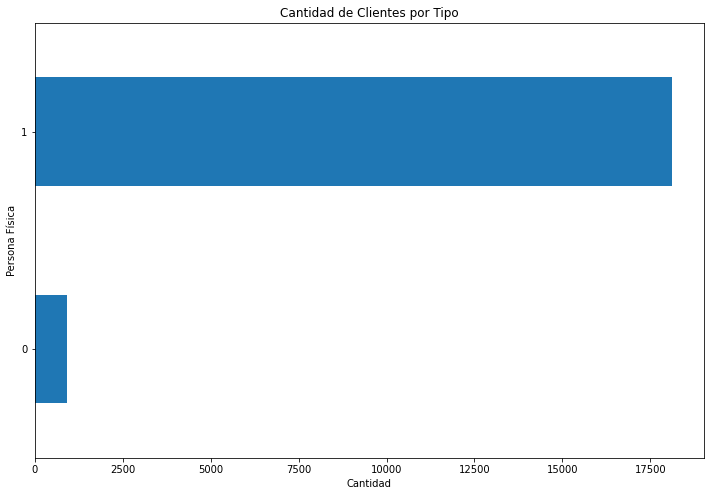

In [83]:
foto_mes['PersonaFisica'].value_counts().sort_values().plot(kind='barh', figsize=(12,8))

plt.ylabel("Persona Física")
plt.xlabel("Cantidad")
plt.title("Cantidad de Clientes por Tipo")
plt.show()

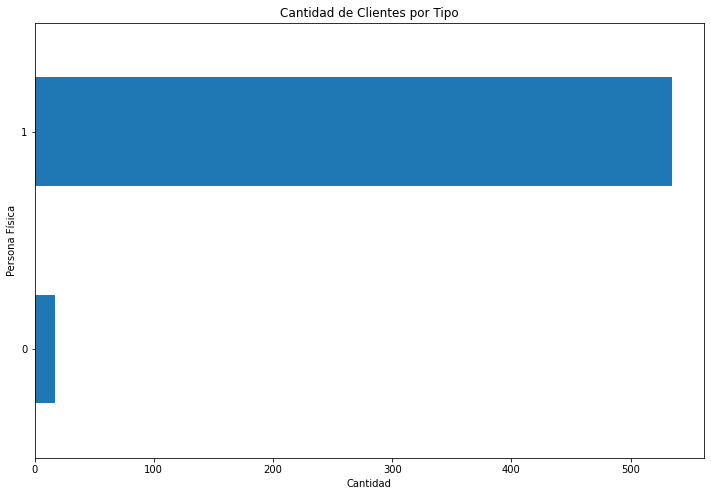

In [84]:
foto_mes_bajas['PersonaFisica'].value_counts().sort_values().plot(kind='barh', figsize=(12,8))

plt.ylabel("Persona Física")
plt.xlabel("Cantidad")
plt.title("Cantidad de Bajas de Clientes por Tipo")
plt.show()

##Analizamos la cantidad de clientes que se encuentran adheridos al Débito Automático


In [89]:
# Filtramos solo los clientes que estan adheridos al debito automatico
mask = (foto_mes_activos['DebitoAutomatico'] == 1 )
foto_mes_activos_debito = foto_mes_activos.loc[mask]

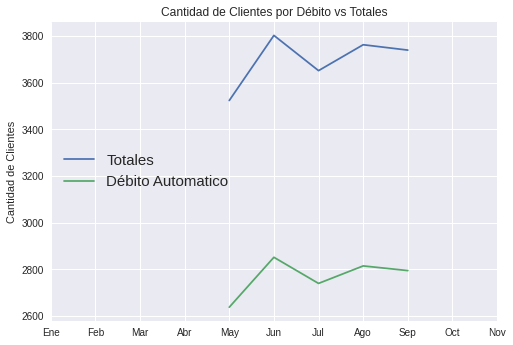

In [90]:
from numpy.ma.core import right_shift
# Ploteamos los datos 
plt.style.use('seaborn')
#plt.colormaps()
labels = [ 'Ene','Feb','Mar','Abr','May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic' ]
foto_mes_activos.groupby('Mes').count()['ServicioIPTV'].plot()
foto_mes_activos_debito.groupby('Mes').count()['ServicioIPTV'].plot()
plt.legend(['Totales','Débito Automatico'],loc='center left',fontsize=15 )
plt.xlabel("")
plt.xticks(labels=labels, ticks=np.arange(1,12,1))
#plt.xticks(labels=labels, ticks=np.arange(1,12,1))
plt.ylabel("Cantidad de Clientes")
plt.title("Cantidad de Clientes por Débito vs Totales")
plt.show()

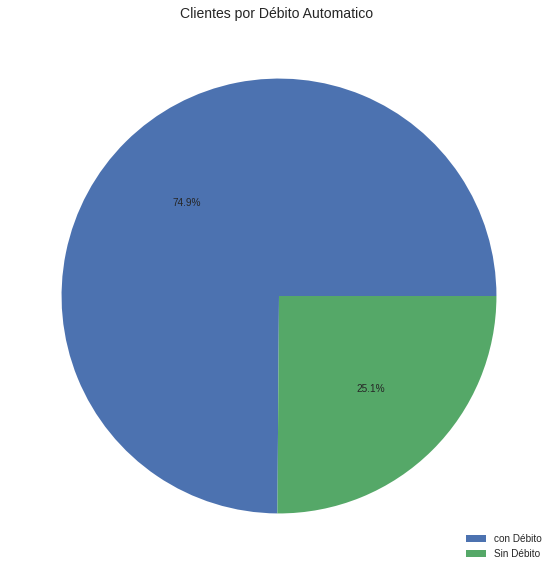

In [91]:
plt.figure(figsize=(10,10))
plt.pie(x = foto_mes_activos['DebitoAutomatico'].value_counts().values,
        labels = foto_mes_activos['DebitoAutomatico'].value_counts().index,
        autopct = '%.1f%%',
        labeldistance = None)
plt.title('Clientes por Débito Automatico ', size=14)
plt.legend(loc='lower right', labels=['con Débito','Sin Débito']);

In [ ]:
##Analizamos los clientes que se dan de baja por Cantidad de Reclamos en el periodo

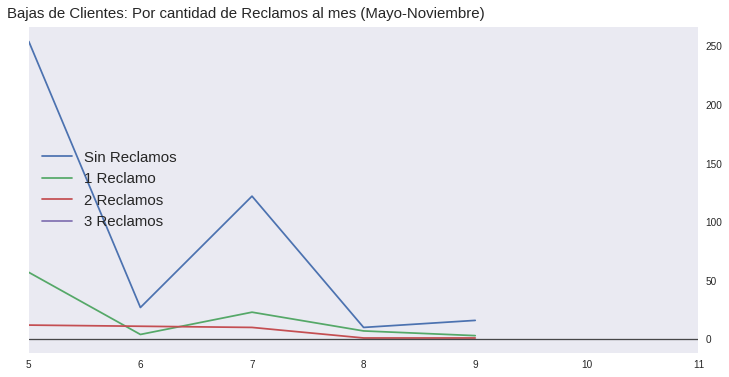

In [95]:
def TotalReclamosMes(df,mes_rel_desde,mes_rel_hasta):
  """
  Desc: Función que plotea las Cantidades Totales de Reclamos por Mes
  Args:
    df (dataframe): Dataframe depurado
    mes_rel_desde: Mes de Lanzamiento para inicio de la escala en eje x
    mes_rel_hasta: Mes de Lanzamiento para fin de la escala en eje x
  Returns:
    Plot por pantalla  
  """  
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots(1, 1, figsize=(12, 6))

  for i, pais in enumerate(df['CantidadReclamos'].value_counts().index):
      pais_rel = df[df['CantidadReclamos']==pais]['Mes'].value_counts().sort_index()
      ax.plot(pais_rel.index, pais_rel, label=pais)
      
  ax.yaxis.tick_right()
  ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha =0.7)

  ax.legend(loc='center left',fontsize=15,labels=['Sin Reclamos', '1 Reclamo', '2 Reclamos', '3 Reclamos'])
  for s in ['top', 'right','bottom','left']:
      ax.spines[s].set_visible(False)

  ax.grid(False)

  ax.set_xlim(mes_rel_desde,mes_rel_hasta)
  plt.xticks(np.arange(5, 12, 1))

  fig.text(0.10, 0.90, "Bajas de Clientes: Por cantidad de Reclamos al mes (Mayo-Noviembre)", fontsize=15)
  ax.tick_params(axis=u'both', which=u'both',length=0)

  plt.show()

TotalReclamosMes(foto_mes_bajas, 5, 11)

##Analizamos la cantidad de clientes que tienen Otros Servicios en el mismo lote

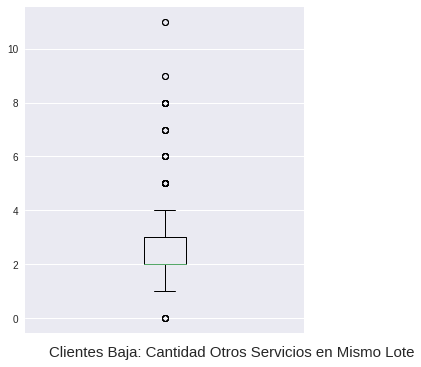

In [96]:
  import matplotlib.pyplot as plt
  
  fig, ax = plt.subplots(1, 1, figsize=(5, 6))
  
  ax.boxplot(foto_mes_bajas['CantOtrosServMismoLote'])  
  ax.set_xticks([])
  ax.grid(True)
  fig.text(0.19, 0.07, "Clientes Baja: Cantidad Otros Servicios en Mismo Lote", fontsize=15)
  plt.show()

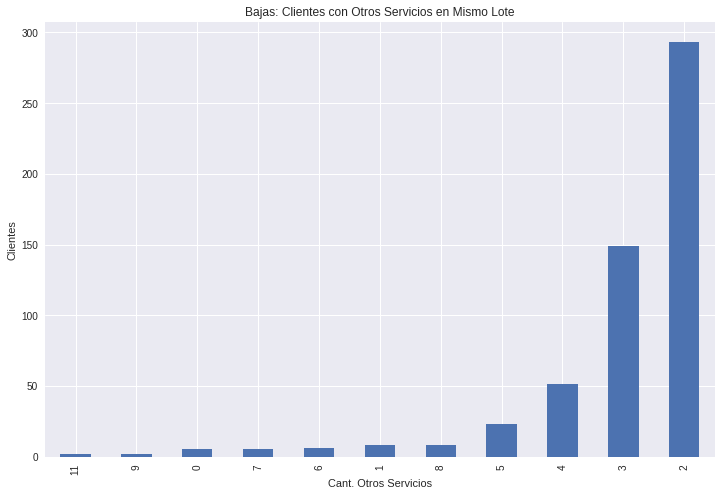

In [105]:
foto_mes_bajas['CantOtrosServMismoLote'].value_counts().sort_values().plot(kind='bar', figsize=(12,8))

plt.ylabel("Clientes")
plt.xlabel("Cant. Otros Servicios")
plt.title("Bajas: Clientes con Otros Servicios en Mismo Lote")
plt.show()

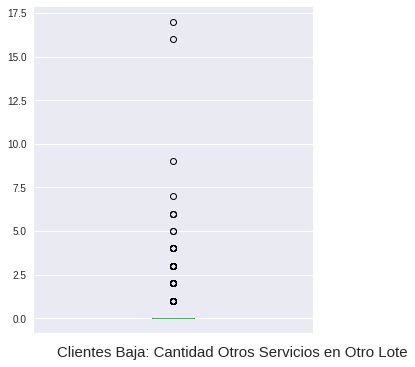

In [101]:
  import matplotlib.pyplot as plt
  
  fig, ax = plt.subplots(1, 1, figsize=(5, 6))
  
  ax.boxplot(foto_mes_bajas['CantOtrosServOtroLote'])  
  ax.set_xticks([])
  ax.grid(True)
  fig.text(0.19, 0.07, "Clientes Baja: Cantidad Otros Servicios en Otro Lote", fontsize=15)
  plt.show()

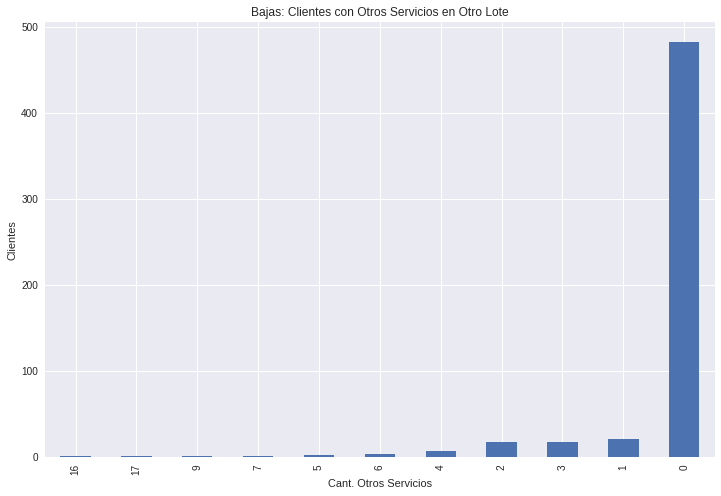

In [106]:
foto_mes_bajas['CantOtrosServOtroLote'].value_counts().sort_values().plot(kind='bar', figsize=(12,8))

plt.ylabel("Clientes")
plt.xlabel("Cant. Otros Servicios")
plt.title("Bajas: Clientes con Otros Servicios en Otro Lote")
plt.show()

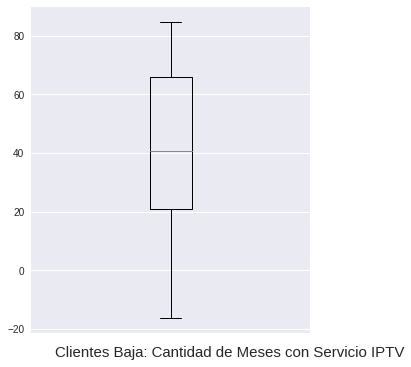

In [108]:
  import matplotlib.pyplot as plt
  
  fig, ax = plt.subplots(1, 1, figsize=(5, 6))
  
  ax.boxplot(foto_mes_bajas['MesesServicio'])  
  ax.set_xticks([])
  ax.grid(True)
  fig.text(0.19, 0.07, "Clientes Baja: Cantidad de Meses con Servicio IPTV", fontsize=15)
  plt.show()

Conclusiones del análisis exploratorio:

* Las proporciones de clientes IPTV que solicitan darse de baja en el período analizado, es variable y no sigue una tendencia clara.

* La cantidad de clientes de tipo Persona Fisica representa mas del 95% del total de los clientes. Esta misma proporción se ve reflejada en los clientes dados de baja.

* Los clientes que abonan a traves de Debito Automatico representan aproximadamente un 25% del total.

* Entre el 70% y el 80% de los clientes que se dan de baja, no realizan ningun  tipo de reclamo previo.

* Los clientes que se dan de baja, tienen en promedio entre 2 y 3 servicios adicionales a IPTV contratados en el mismo lote. 

* Los clientes que se dan de baja, en su gran mayoría no tienen servicios contratados en otros lotes.

* La mitad de los clientes de IPTV que se dan de baja permanecen en el servicio entre 20 y 64 meses. Con una media de permanencia de 40 meses.